<br/>
# National Supported Work Demonstration
<br/>
<br/>
We will work with a by-now classic dataset from Robert LaLonde's study "<a href="http://people.hbs.edu/nashraf/LaLonde_1986.pdf">Evaluating the Econometric Evaluations of Training Programs</a>" (1986). The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program. Your task is to determine the effectiveness of the "treatment" represented by the job training program.
<br/>
<br/>
<br/>

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Question 1: Propensity score matching
### 1. A naive analysis

In [137]:
dataset = pd.read_csv("lalonde.csv")

treatedGroup = dataset[dataset['treat'] == 1]
controlGroup = dataset[dataset['treat'] == 0]

meanByTreat = dataset.groupby('treat').mean()
meanByTreat

,age,educ,black,hispan,married,nodegree,re74,re75,re78
treat,,,,,,,,,
0,28.030303,10.235431,0.202797,0.142191,0.512821,0.596737,5619.236506,2466.484443,6984.169742
1,25.816216,10.345946,0.843243,0.059459,0.189189,0.708108,2095.573689,1532.055314,6349.143530


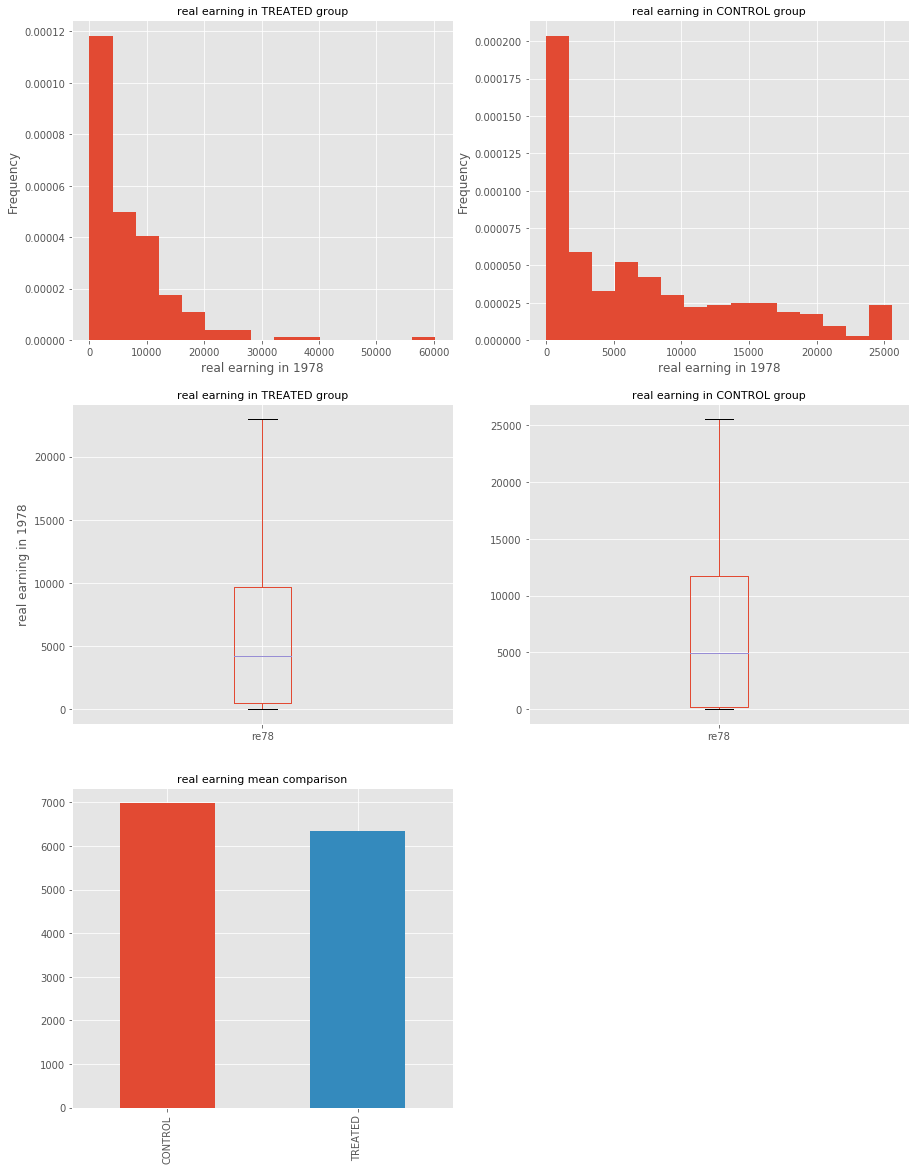

In [144]:
plt.figure(figsize=(15, 20))


plt.subplot(3,2,1)
tmp = treatedGroup['re78'].plot.hist(by='re78',bins=15, normed=True)
tmp.set_title('real earning in TREATED group', fontsize=11)
tmp.set_xlabel('real earning in 1978')

plt.subplot(3,2,2)
tmp = controlGroup['re78'].plot.hist(by='re78',bins=15, normed=True)
tmp.set_title('real earning in CONTROL group', fontsize=11)
tmp.set_xlabel('real earning in 1978')

plt.subplot(3,2,3)
tmp = treatedGroup[['re78']].boxplot(showfliers=False)
tmp.set_title('real earning in TREATED group', fontsize=11)
tmp.set_ylabel('real earning in 1978')

plt.subplot(3,2,4)
tmp = controlGroup[['re78']].boxplot(showfliers=False)
tmp.set_title('real earning in CONTROL group', fontsize=11)

plt.subplot(3,2,5)
tmp = meanByTreat['re78'].copy()
tmp.index = ['CONTROL', 'TREATED']
tmp = tmp.plot(kind='bar');
tmp.set_title('real earning mean comparison', fontsize=11)


plt.show()

<br/>
<br/>
The control group has an higher revenue than the treated group. <br/>
The naive analysis would be to conclude that following a training course decreases the revenue.
<br/>

### 2. A closer look at the data

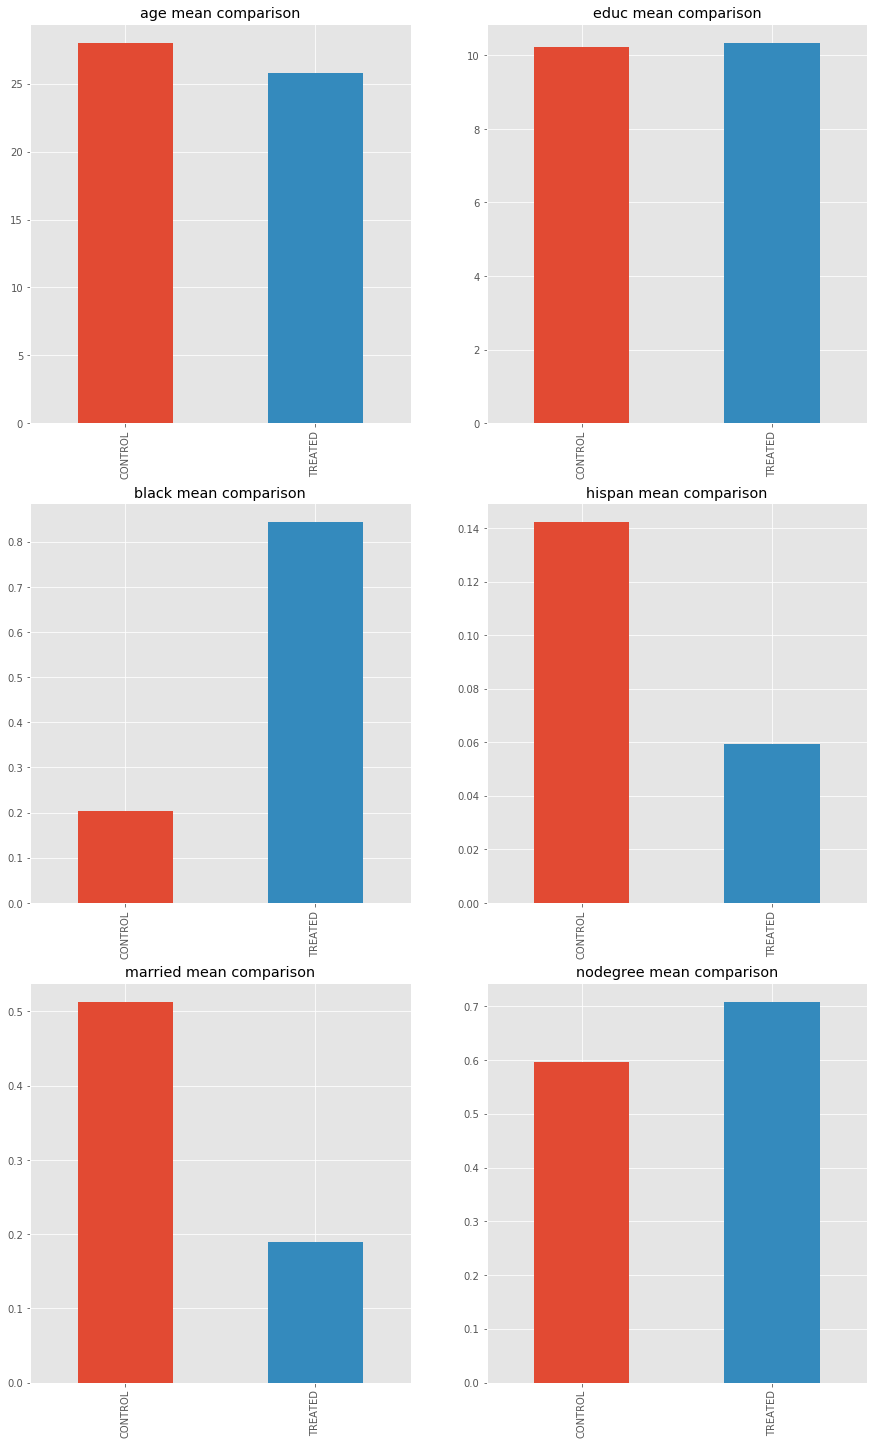

In [146]:
def buildMeanDifferenciesChart(columnName):
    tmp = meanByTreat[columnName].copy()
    tmp.index = ['CONTROL', 'TREATED']
    tmp = tmp.plot(kind='bar')
    tmp.set_title(columnName+' mean comparison')

    
plt.figure(figsize=(15, 25))

plt.subplot(3,2,1)
buildMeanDifferenciesChart('age')

plt.subplot(3,2,2)
buildMeanDifferenciesChart('educ')

plt.subplot(3,2,3)
buildMeanDifferenciesChart('black')

plt.subplot(3,2,4)
buildMeanDifferenciesChart('hispan')

plt.subplot(3,2,5)
buildMeanDifferenciesChart('married')

plt.subplot(3,2,6)
buildMeanDifferenciesChart('nodegree')

plt.show()

We can see that the control group and the treated one seems to be different.<br/>
To insure this property more fundamentally, we could verify using confidence interval.<br/>
However the black people mean percentage and the married mean percentage clearly shows disparities.<br/>
We can conclude that the 'treat' value is not drawn randomly from the population.<br/>
Therefore the naive conlusion is not relevant. 

### 3. A propensity score model

In [147]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression()